# **Comprehensive Exploratory Data Analysis (EDA) for NBA Matchups (2007-2008)**
This notebook performs a detailed EDA on the NBA matchups datasets from 2007 and 2008.
We will analyze trends, player statistics, team performances, and correlations between variables using various visualization techniques.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Load datasets
df_2007 = pd.read_csv('matchups-2007.csv')
df_2008 = pd.read_csv('matchups-2008.csv')

# Combine both datasets for analysis
df = pd.concat([df_2007, df_2008], ignore_index=True)

# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54093 entries, 0 to 54092
Data columns (total 53 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   game           54093 non-null  object 
 1   season         54093 non-null  int64  
 2   home_team      54093 non-null  object 
 3   away_team      54093 non-null  object 
 4   starting_min   54093 non-null  int64  
 5   end_min        54093 non-null  int64  
 6   home_0         54093 non-null  object 
 7   home_1         54093 non-null  object 
 8   home_2         54093 non-null  object 
 9   home_3         54093 non-null  object 
 10  home_4         54093 non-null  object 
 11  away_0         54093 non-null  object 
 12  away_1         54093 non-null  object 
 13  away_2         54093 non-null  object 
 14  away_3         54093 non-null  object 
 15  away_4         54093 non-null  object 
 16  fga_home       54093 non-null  int64  
 17  fta_home       54093 non-null  int64  
 18  fgm_ho

## **Checking for Missing Values**

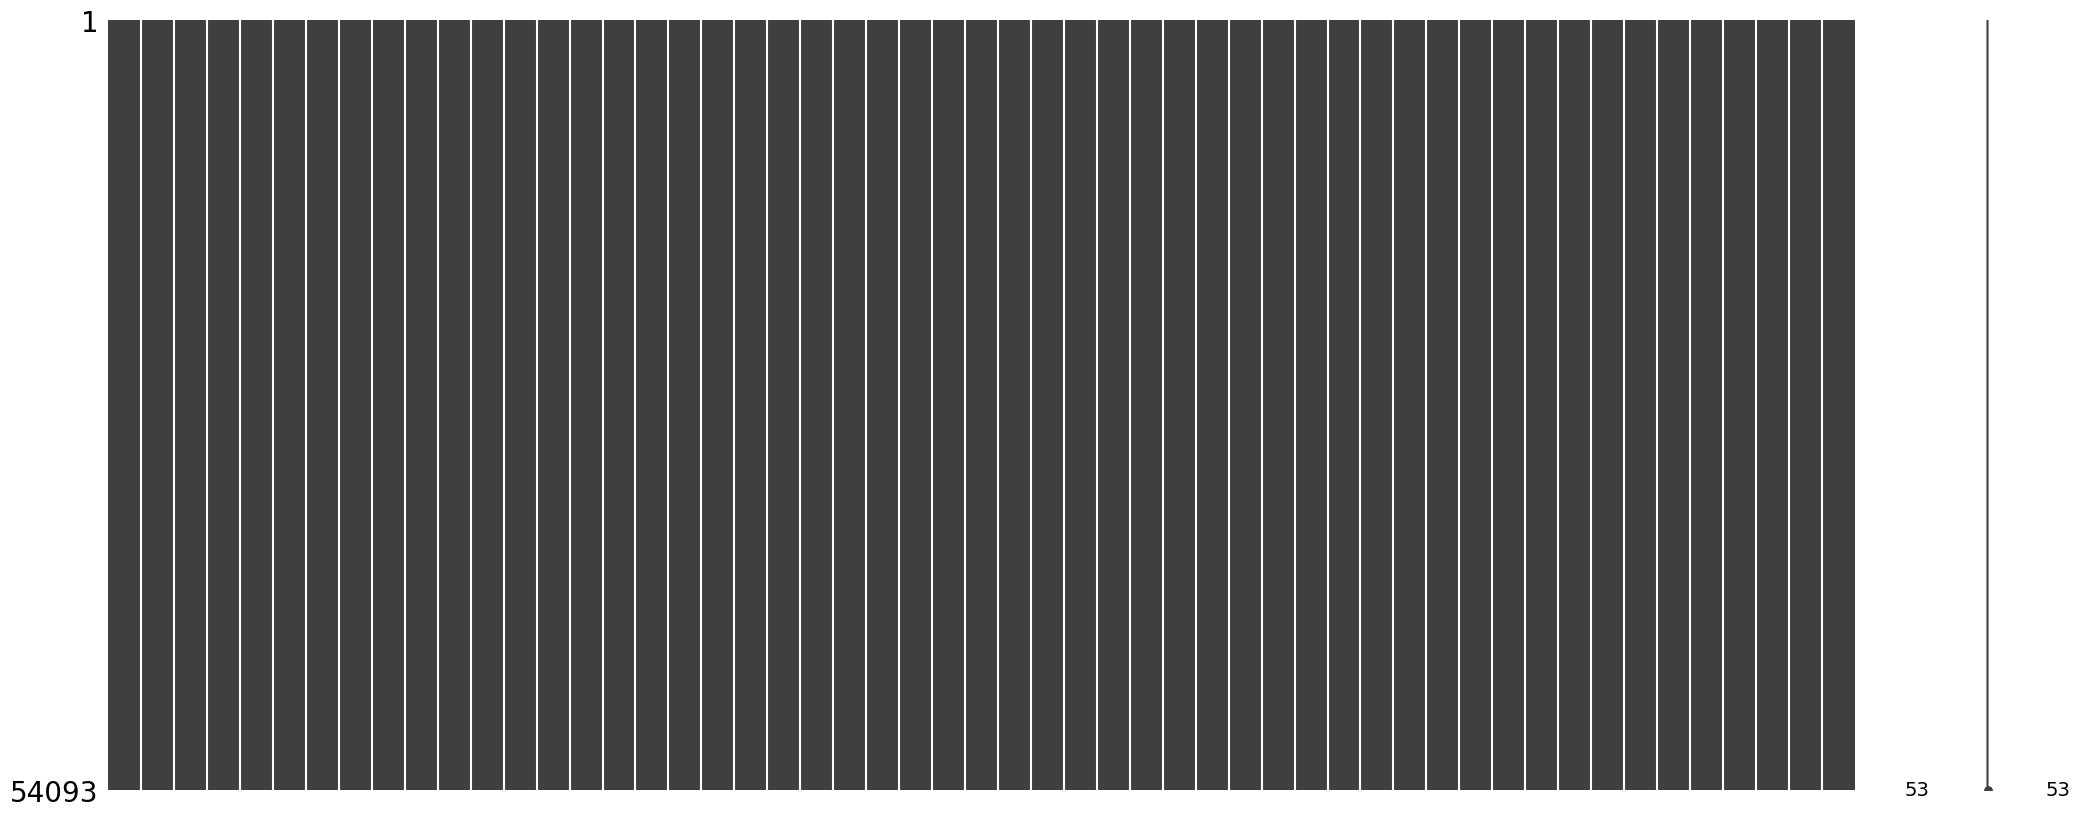

,0


In [2]:
# Visualizing missing data
msno.matrix(df)
plt.show()

# Counting missing values per column
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

## **Statistical Summary of Numeric Features**

In [3]:
# Summary statistics for numeric features
df.describe().T

,count,mean,std,min,25%,50%,75%,max
season,54093.0,2007.491616,0.499934,2007.0,2007.0,2007.000000,2008.000000,2008.0
starting_min,54093.0,24.580704,12.968639,0.0,14.0,24.000000,36.000000,47.0
end_min,54093.0,25.758268,12.675367,1.0,15.0,24.000000,37.000000,47.0
fga_home,54093.0,3.114673,3.156466,0.0,1.0,2.000000,4.000000,29.0
fta_home,54093.0,1.005380,1.565720,0.0,0.0,0.000000,2.000000,21.0
fgm_home,54093.0,1.448727,1.711084,0.0,0.0,1.000000,2.000000,15.0
fga_2_home,54093.0,2.428096,2.663140,0.0,1.0,2.000000,3.000000,24.0
fgm_2_home,54093.0,1.199083,1.514266,0.0,0.0,1.000000,2.000000,13.0
fga_3_home,54093.0,0.686577,1.005827,0.0,0.0,0.000000,1.000000,11.0
fgm_3_home,54093.0,0.249644,0.548047,0.0,0.0,0.000000,0.000000,6.0


## **Distribution of Numeric Features**

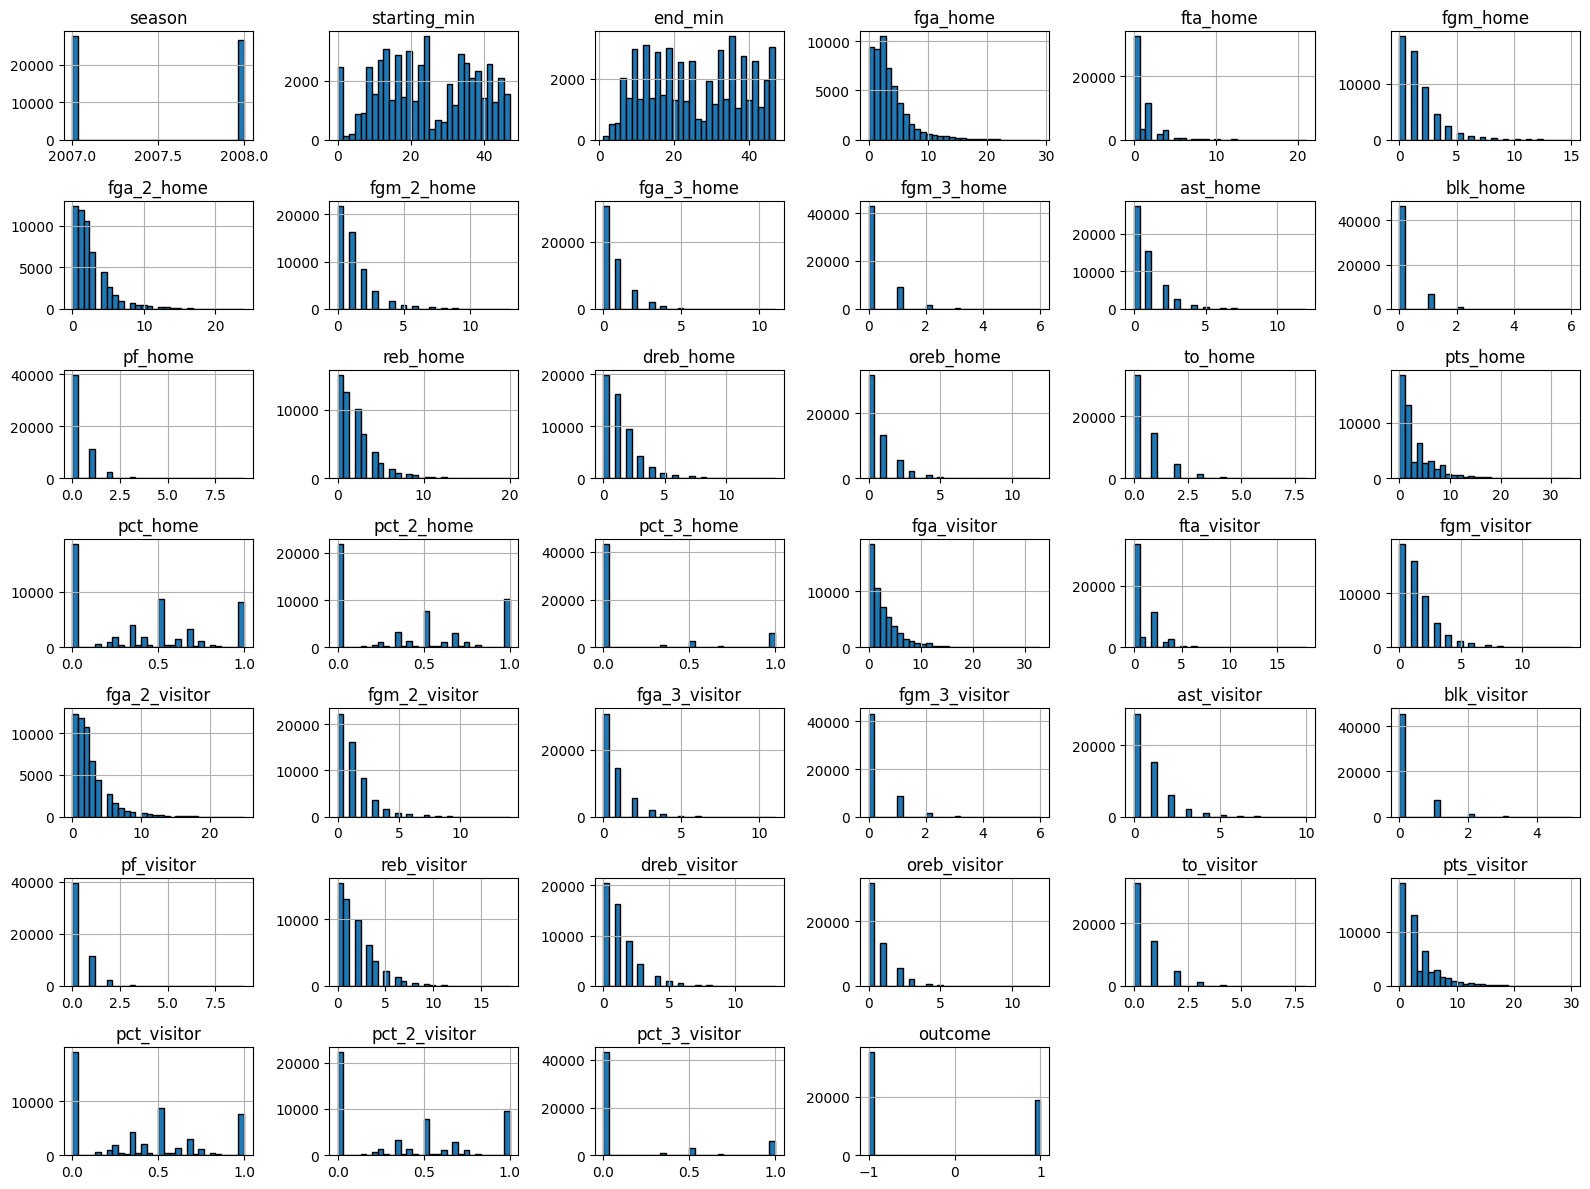

In [4]:
# Plot histograms for all numerical features
df.hist(figsize=(16, 12), bins=30, edgecolor='black')
plt.tight_layout()
plt.show()

## **Boxplots to Detect Outliers**

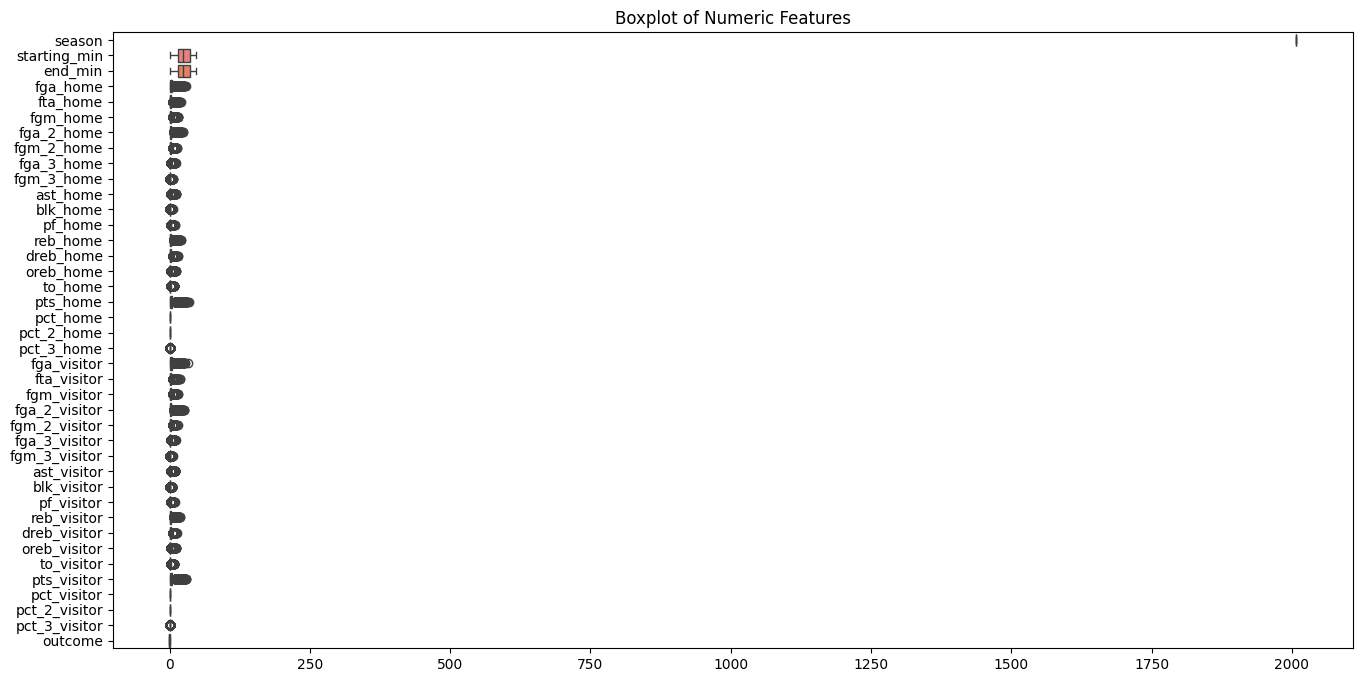

In [5]:
# Boxplots for numerical features
plt.figure(figsize=(16, 8))
sns.boxplot(data=df, orient='h')
plt.title('Boxplot of Numeric Features')
plt.show()

## **Analyzing Categorical Features**

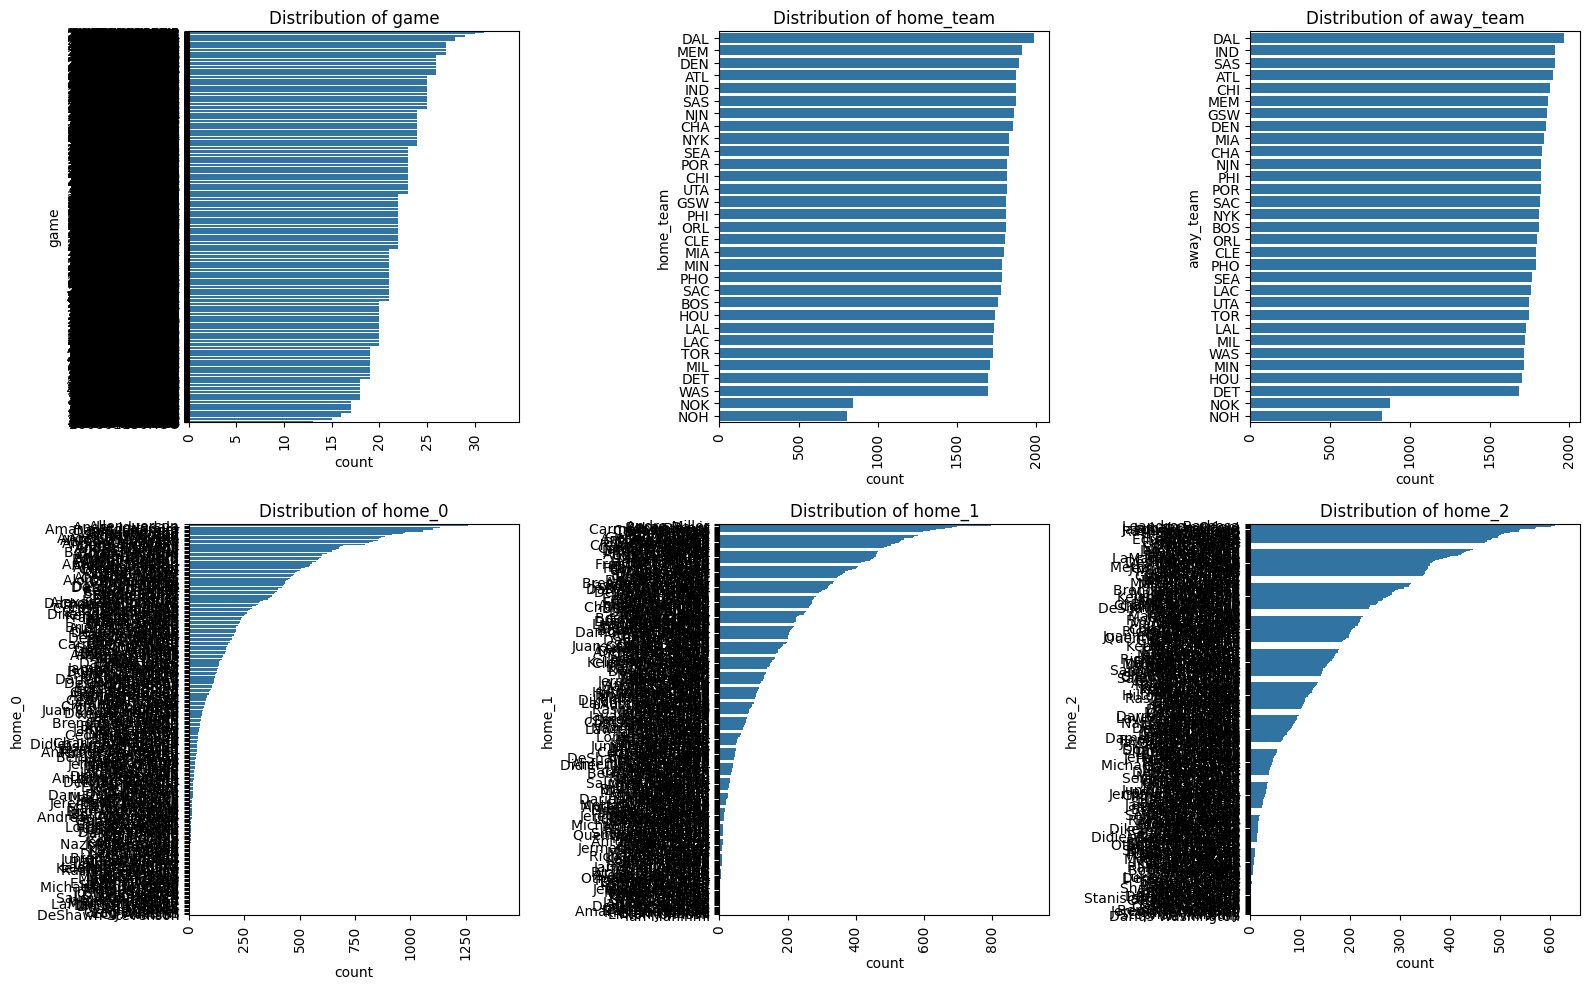

In [6]:
# Count plots for categorical variables
categorical_columns = df.select_dtypes(include=['object']).columns
plt.figure(figsize=(16, 10))
for i, col in enumerate(categorical_columns[:6], 1):
    plt.subplot(2, 3, i)
    sns.countplot(y=df[col], order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## **Correlation Heatmap**

In [7]:
# Compute the correlation matrix
plt.figure(figsize=(16, 12))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

ValueError: could not convert string to float: '200610310LAL'

<Figure size 1600x1200 with 0 Axes>

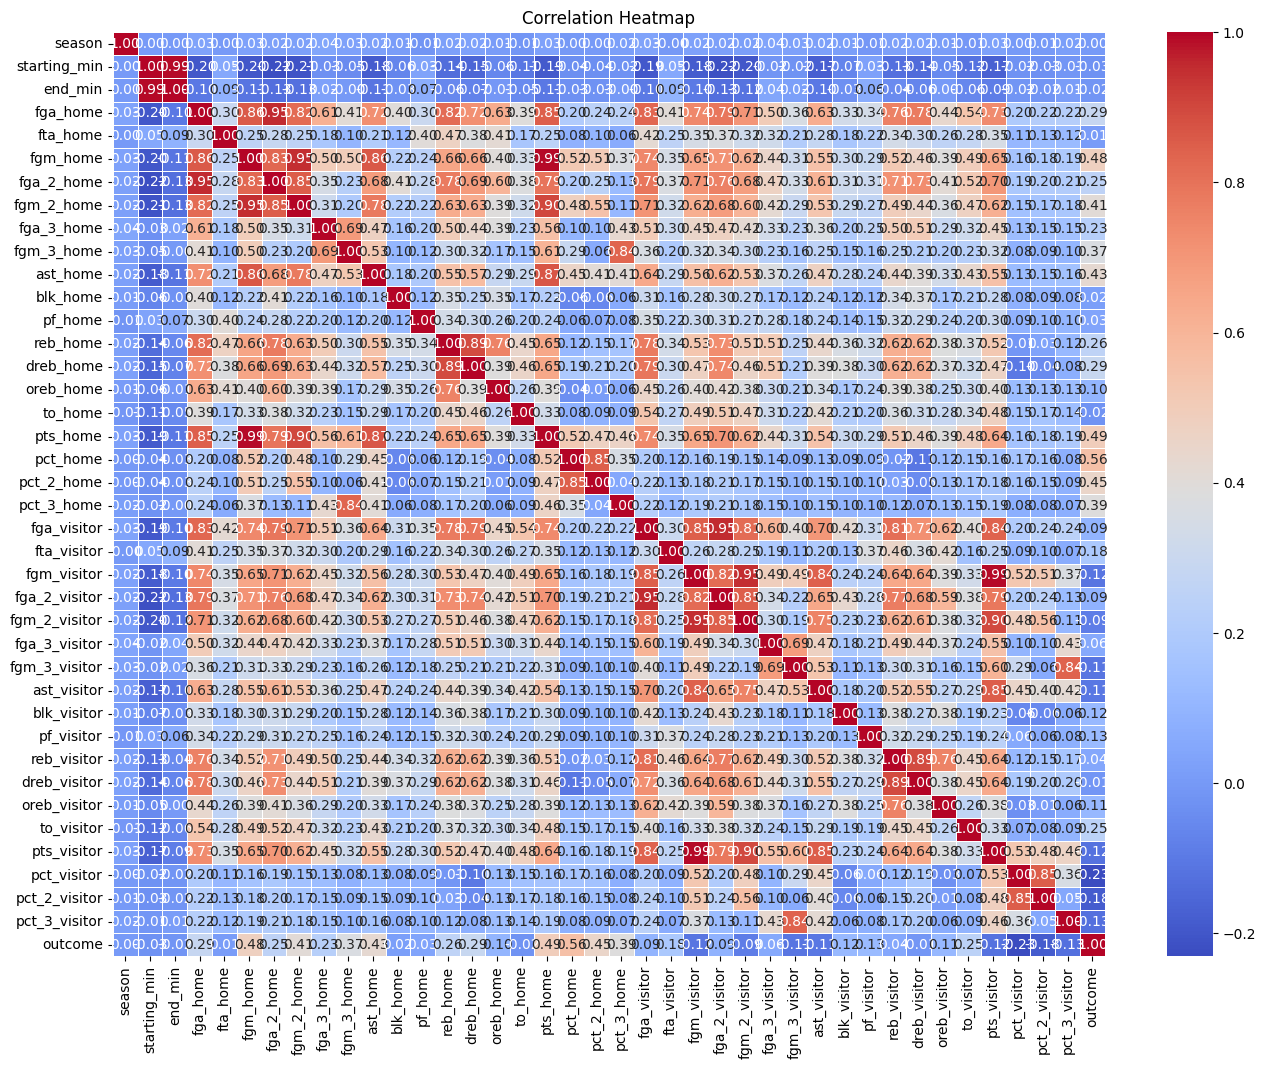

In [8]:
# Compute the correlation matrix
plt.figure(figsize=(16, 12))
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=np.number)
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

## **Time-Series Analysis: Performance Across Seasons**

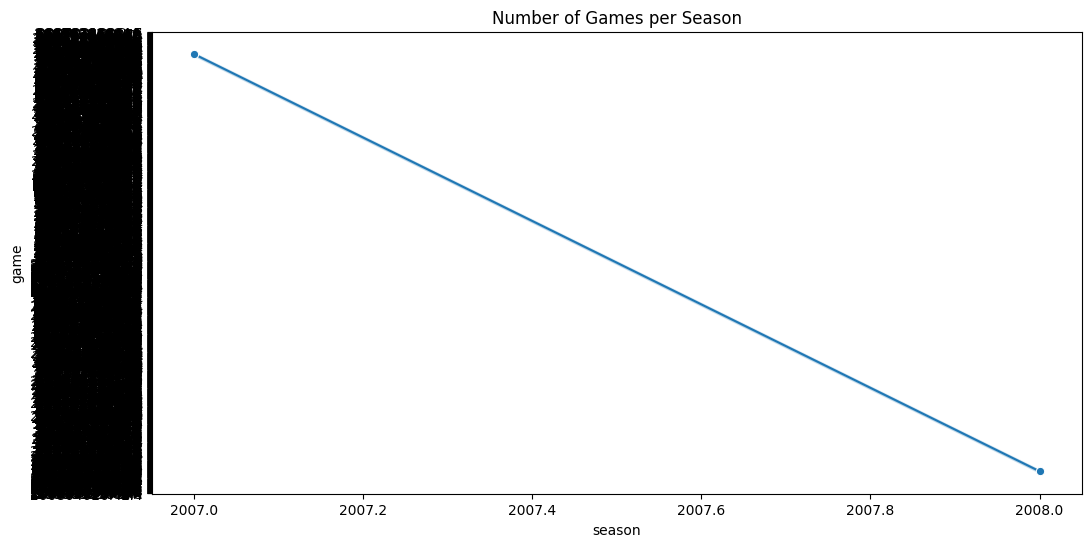

In [9]:
# Line plot to visualize trends over seasons
plt.figure(figsize=(12, 6))
sns.lineplot(x='season', y='game', data=df, marker='o')
plt.title('Number of Games per Season')
plt.show()

## **Team Performance Analysis**

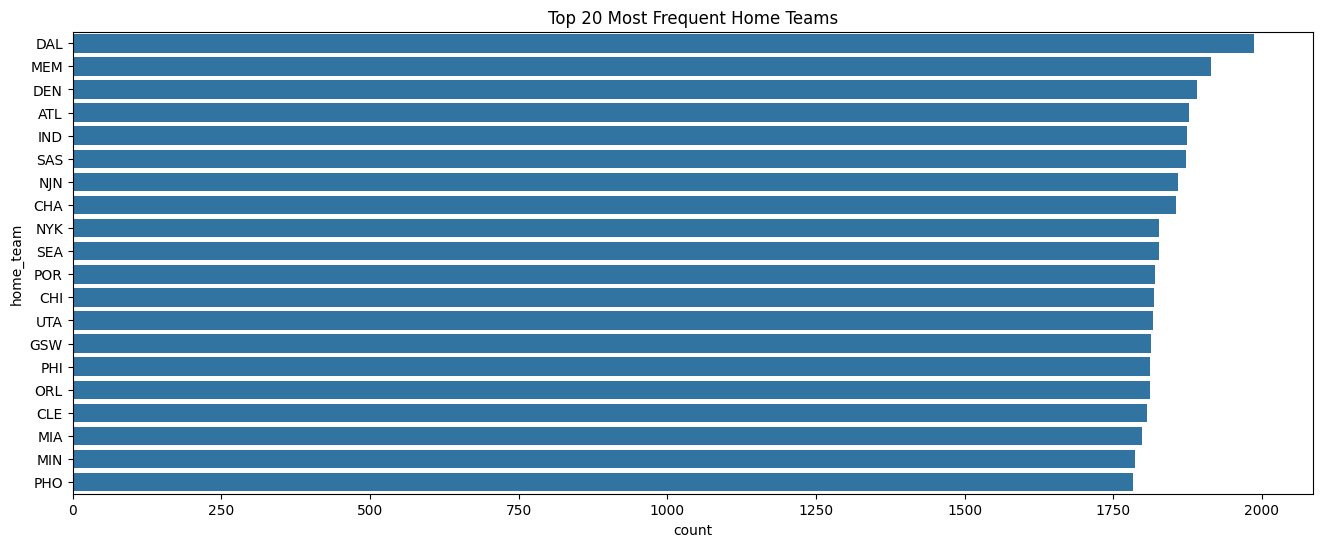

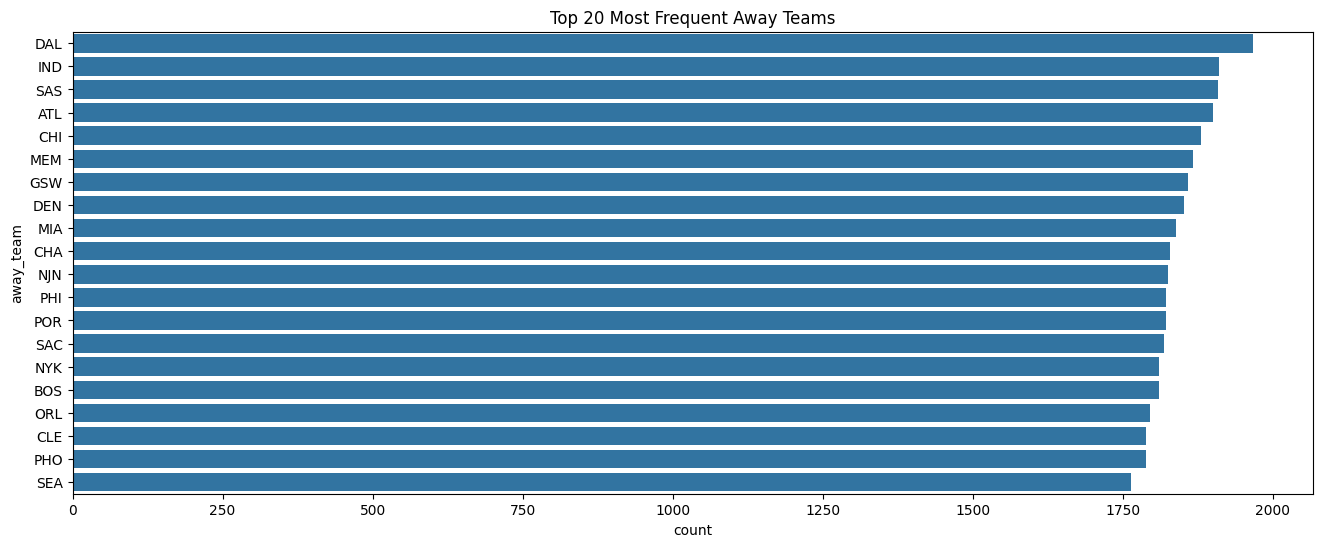

In [10]:
# Countplot of home and away team appearances
plt.figure(figsize=(16, 6))
sns.countplot(y=df['home_team'], order=df['home_team'].value_counts().index[:20])
plt.title('Top 20 Most Frequent Home Teams')
plt.show()

plt.figure(figsize=(16, 6))
sns.countplot(y=df['away_team'], order=df['away_team'].value_counts().index[:20])
plt.title('Top 20 Most Frequent Away Teams')
plt.show()

## **Conclusion**
- We explored the dataset, visualized distributions, and analyzed categorical and numerical trends.
- We examined missing values, outliers, and correlations between features.
- Team performance insights and seasonal trends were highlighted.
- Further analysis can be conducted on individual player performance and team success factors.